## Question 1

### (a)

$ 1.5 + 0.7X_{i1} −1.5X_{i2} + 0.9X_{i3} >= 0$

$ Y_{i} = 1$

### (b)
$ l_{0} = 0.7$

$ l_{1} = 0.85$

$ l_{2} = 0.9$

$ l_{3} = 0.75$

$ l_{4} = 0.8$

### (c)

$\mathbb{E}_{X}\left[\text{squared loss}\right]=\mathbb{E}_{X}\left(\underbrace{\mathbb{E}_{\mathcal{D}}\left[f(\boldsymbol{x}^{(i)})-\hat{f}(\boldsymbol{x}^{(i)})\right]^{2}}_{\text{bias of }\hat{f}}+\underbrace{\text{Var}_{\mathcal{D}}\left[\hat{f}(\boldsymbol{x}^{(i)})\right]}_{\text{variance of}\,\hat{f}}+\underbrace{\text{Var}_{\epsilon}[\epsilon]}_{\text{irreducible error}}\right)$

* Bias      = expected value of how model differs with reality  (reducible)

* Variance = spread of prediction on different datasets (reducible)

* Noise      = inherent variation in dataset/problem (irreducible)


## Question 2


In [2]:
#Import necessary Python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
# Load the data as "dataframe"
rtb = pd.get_dummies(pd.read_csv("D:/Study/Business Analytics/LA/HW3/RTB.csv"))
# check the dataframe
rtb.head()

,Unnamed: 0,dc,atype,bidf,instl,isp,nt,mfr_Apple,mfr_Coolpad,mfr_Gionee,mfr_Huawei,mfr_Meizu,mfr_OPPO,mfr_Others,mfr_Samsung,mfr_Xiaomi,mfr_vivo,period_Afternoon,period_Evening,period_Morning
0,0,1,8,0.0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,1,8,0.0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
2,2,1,8,0.0,1,3,1,0,0,0,1,0,0,0,0,0,0,0,1,0
3,3,1,8,0.0,0,2,1,0,0,0,1,0,0,0,0,0,0,1,0,0
4,4,1,8,0.0,0,3,1,0,1,0,0,0,0,0,0,0,0,0,1,0


In [7]:
rtb = np.array(rtb)
print(rtb)

[[0.000e+00 1.000e+00 8.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 [1.000e+00 1.000e+00 8.000e+00 ... 1.000e+00 0.000e+00 0.000e+00]
 [2.000e+00 1.000e+00 8.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 ...
 [4.693e+03 0.000e+00 8.000e+00 ... 1.000e+00 0.000e+00 0.000e+00]
 [4.694e+03 0.000e+00 8.000e+00 ... 1.000e+00 0.000e+00 0.000e+00]
 [4.695e+03 0.000e+00 8.000e+00 ... 1.000e+00 0.000e+00 0.000e+00]]


In [8]:
y = rtb[:,1].astype('int')
X = np.hstack((rtb[:,2].astype('int').reshape(4696,1),rtb[:,3].astype('float').reshape(4696,1),rtb[:,4:].astype('int')))
print(X)

[[8. 0. 0. ... 0. 1. 0.]
 [8. 0. 0. ... 1. 0. 0.]
 [8. 0. 1. ... 0. 1. 0.]
 ...
 [8. 0. 0. ... 1. 0. 0.]
 [8. 0. 0. ... 1. 0. 0.]
 [8. 0. 0. ... 1. 0. 0.]]


### (a)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_test = {
        'n_neighbors':range(1, 15)
    }

estimator = KNeighborsClassifier(n_neighbors = 1) 

gsearch = GridSearchCV( estimator , param_grid = param_test, cv=10 ,scoring='accuracy')
gsearch.fit(X, y)
gsearch.best_params_, gsearch.best_score_
print('best score is:',str(gsearch.best_score_))
print('best params are:',str(gsearch.best_params_))

best score is: 0.600298126064736
best params are: {'n_neighbors': 14}


### (b)

In [13]:
param_test = {
        'C':np.logspace(-3, 3)
    }

estimator = linear_model.LogisticRegression(penalty='l2')
    
gsearch = GridSearchCV( estimator , param_grid = param_test, cv=10 ,scoring='accuracy')
gsearch.fit( X, y)
gsearch.best_params_, gsearch.best_score_
print('best score is:',str(gsearch.best_score_))
print('best params are:',str(gsearch.best_params_))

best score is: 0.8077086882453152
best params are: {'C': 0.3727593720314938}


### (c)

In [12]:
param_test = {
        'C':np.logspace(-3, 3)
    }

estimator = linear_model.LogisticRegression(penalty='l1')
    
gsearch = GridSearchCV( estimator , param_grid = param_test, cv=10 ,scoring='accuracy')
gsearch.fit( X, y)
gsearch.best_params_, gsearch.best_score_
print('best score is:',str(gsearch.best_score_))
print('best params are:',str(gsearch.best_params_))

best score is: 0.8077086882453152
best params are: {'C': 0.655128556859551}


## Question 3

### (a)

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
# Load the data as "dataframe"
train = pd.read_csv("D:/Study/Business Analytics/LA/HW3/BVTradeoff_train.csv")
train.head()

,X.train,Y.train
0,-1.834344,9.875748
1,0.211264,0.629803
2,0.829149,14.779012
3,0.675009,-10.177690
4,0.642912,-24.062628


In [16]:
X_train = np.array(train)[:,0].reshape(2018,1)
Y_train = np.array(train)[:,1]

In [19]:
# This function is a composite that fits a polynomial regression
# @param: d: polynomial degree
# @return: model: the fitted model

def poly(d):
    model = Pipeline([('poly', PolynomialFeatures(degree=d)),
                     ('linear', LinearRegression(fit_intercept=False))])
    model = model.fit(X_train,Y_train)
    return model

In [6]:
# run five polynomial regressions, from degree 1 to 5
for i in range(5):
    model1 = poly(i+1)
    print(i+1,model1.named_steps['linear'].coef_)
    

1 [2.93382442 5.81165244]
2 [0.9091618  5.91987792 1.97224146]
3 [0.78970312 3.03367003 2.1587477  1.00844241]
4 [0.94145828 3.00967952 1.83611626 1.02276221 0.06115025]
5 [ 0.9415646   2.89664786  1.83788985  1.10771058  0.06023655 -0.01027686]


### (b)

In [20]:
test = pd.read_csv("D:/Study/Business Analytics/LA/HW3/BVTradeoff_test.csv")
X_test  = np.array(test)[:,0].reshape(2018,1)
Y_test  = np.array(test)[:,1]

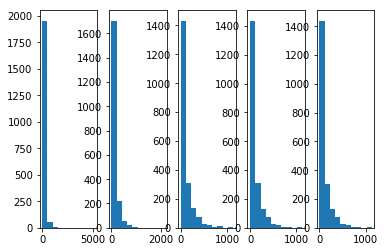

In [21]:
test = pd.read_csv("D:/Study/Business Analytics/LA/HW3/BVTradeoff_test.csv")
X_test  = np.array(test)[:,0].reshape(2018,1)
Y_test  = np.array(test)[:,1]

se=[]
y_pred=[]
fig, axs = plt.subplots(1, 5)
for i in range(5):
    model1 = poly(i+1)
    temp = model1.predict(X_test)
    y_pred.append(temp)
    x = np.square(temp - Y_test)
    axs[i].hist(x)

### (c)

[120.59167110402211, 108.22334883014693, 101.30897361439519, 101.40136742756752, 101.37737889481345]


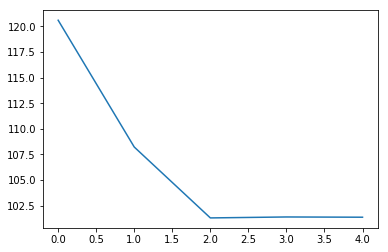

In [23]:
mse=[]
y_pred=[]
from sklearn.metrics import mean_squared_error
for i in range(5):
    model1 = poly(i+1)
    temp = model1.predict(X_test)
    y_pred.append(temp)
    x = np.sum(np.square(Y_test - temp))
    mse.append(mean_squared_error(Y_test, y_pred[i]))
print(mse)
plt.plot(mse)

### (d)

In [1]:
def original(X):
    r = np.array(np.multiply(np.multiply(X,X),X) + 2 * np.square(X) + 3 * X + 1)
    return r

[18.35320803323258, 6.754666763867708, 0.06480487242840584, 0.23926751617333905, 0.1766749159008407]


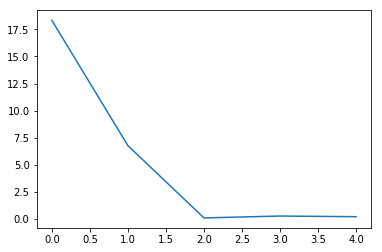

In [30]:
newY = original(X_test).ravel()
bias=[]
for i in range(5):
    model1 = poly(i+1)
    temp = model1.predict(X_test)
    x = np.average(np.square(newY-temp))
    bias.append(x)
print(bias)
plt.plot(bias)

### (e)

[36.15745878108705, 48.78492700568206, 63.6886654478991, 65.86353387981332, 65.13784777090278]


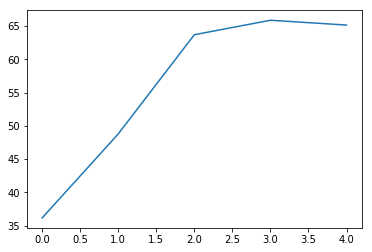

In [26]:
variance=[]
y_pred=[]
for i in range(5):
    model1 = poly(i+1)
    temp = model1.predict(X_test)
    variance.append(np.var(temp))
print(variance)
plt.plot(variance)